In [1]:
import numpy as np
import pandas as pd
from scipy.stats import kstest,ttest_ind
from scipy.stats.contingency import odds_ratio
from scipy.stats import fisher_exact
import seaborn as sns
from matplotlib.ticker import MultipleLocator
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams.update({'font.size': 14, 'axes.linewidth': 2, 'xtick.major.width': 1.5, 'xtick.major.size': 7, 'ytick.major.width': 1.5, 'ytick.major.size': 7})
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
bmi_df = pd.read_csv(
    "/data6/deepro/ukb_bmi/0_data_preparation_and_download/phenotype/data/bmi_processed/filtered_bmi_info.csv.gz",
    usecols=["bmi", "sample_names", "sex", "menopause"])

In [3]:
bmi_female_df = bmi_df.loc[(bmi_df.sex=="Female")&(bmi_df.menopause.isin(["Yes", "No"]))]

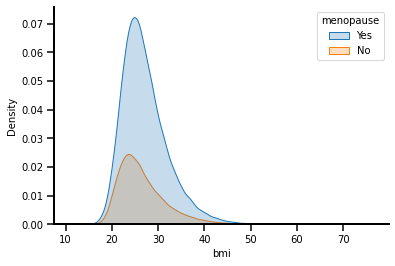

In [4]:
sns.kdeplot(data=bmi_female_df, x='bmi', hue='menopause', fill=True)
sns.despine()

In [5]:
def create_case_col(df, filter_column, filter_val, thresh=None):
    filt_df = df.loc[df[filter_column]==filter_val]
    if not thresh:
        thresh = filt_df.bmi.mean() + 2*filt_df.bmi.std()
    filt_df["cases"] = filt_df.bmi>thresh
    return filt_df

In [6]:
premeno_bmi = create_case_col(bmi_female_df, "menopause", "No")

/tmp/ipykernel_100676/2710216536.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df["cases"] = filt_df.bmi>thresh


In [7]:
postmeno_bmi = create_case_col(bmi_female_df, "menopause", "Yes")

/tmp/ipykernel_100676/2710216536.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filt_df["cases"] = filt_df.bmi>thresh


In [8]:
table = [[len(premeno_bmi.loc[premeno_bmi.cases==True]), len(postmeno_bmi.loc[postmeno_bmi.cases==True])], [len(premeno_bmi.loc[premeno_bmi.cases==False]), len(postmeno_bmi.loc[postmeno_bmi.cases==False])]]
df = pd.DataFrame(table, columns=["PreMenopausal", "PostMenopausal"], index=["Obese", "Non-obese"])

In [9]:
df

,PreMenopausal,PostMenopausal
Obese,2576,7122
Non-obese,52185,156638


In [10]:
fisher_exact(df)

SignificanceResult(statistic=1.0856637343484288, pvalue=0.0005092372018721167)

In [11]:
res = odds_ratio(df)

In [12]:
res.statistic, res.confidence_interval(confidence_level=0.95)

(1.0856633184169446,
 ConfidenceInterval(low=1.0363045098490353, high=1.137112913538326))